<a href="https://colab.research.google.com/github/tainangao/Avocado-/blob/master/Missing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [5]:
mvc = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes.csv')
mvc.shape

(123195, 29)

In [6]:
mvc.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,06/25/2019,20:30,MANHATTAN,10018.0,40.751080,-73.986860,POINT (-73.98686 40.75108),WEST 36 STREET,AVENUE OF THE AMERICAS,NaN,0,0.0,0,0,0,0,0,0,Failure to Yield Right-of-Way,Failure to Yield Right-of-Way,NaN,NaN,NaN,4159037,Sedan,Taxi,NaN,NaN,NaN
1,07/15/2019,9:00,BRONX,10467.0,40.879055,-73.874390,POINT (-73.87439 40.879055),EAST GUN HILL ROAD,PERRY AVENUE,NaN,0,0.0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4171027,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
2,07/03/2019,17:00,BROOKLYN,11212.0,40.657856,-73.903824,POINT (-73.903824 40.657856),NaN,NaN,843 STONE AVENUE,0,0.0,0,0,0,0,0,0,Passing Too Closely,Unspecified,NaN,NaN,NaN,4164971,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
3,07/17/2019,19:08,NaN,NaN,NaN,NaN,NaN,PELHAM PARKWAY SOUTH,EASTCHESTER ROAD,NaN,1,0.0,0,0,0,0,1,0,Reaction to Uninvolved Vehicle,Driver Inattention/Distraction,NaN,NaN,NaN,4172323,Sedan,Sedan,NaN,NaN,NaN
4,06/25/2019,14:40,STATEN ISLAND,10304.0,40.615204,-74.084656,POINT (-74.084656 40.615204),TARGEE STREET,VANDERBILT AVENUE,NaN,0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,4168004,Bus,Tractor Truck Diesel,NaN,NaN,NaN


In [7]:
type(mvc.iloc[0,0])

str

In [0]:
import datetime as dt


In [0]:
mvc['CRASH DATE'] = [dt.datetime.strptime(x,'%m/%d/%Y') for x in mvc['CRASH DATE']]
mvc['CRASH TIME'] = [dt.datetime.strptime(x, '%H:%M') for x in mvc['CRASH TIME']]

In [10]:
mvc_19 = mvc[mvc['CRASH DATE'].dt.year==2019]
mvc_19.shape

(110390, 29)

In [11]:
mvc_19.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

In [12]:
mvc_19.columns = mvc_19.columns.str.lower().str.replace('number of ','').str.replace(' name','').str.replace('contributing factor ','cause ').str.replace('type code ','').str.replace(' ','_')

mvc_19.columns

Index(['crash_date', 'crash_time', 'borough', 'zip_code', 'latitude',
       'longitude', 'location', 'on_street', 'cross_street', 'off_street',
       'persons_injured', 'persons_killed', 'pedestrians_injured',
       'pedestrians_killed', 'cyclist_injured', 'cyclist_killed',
       'motorist_injured', 'motorist_killed', 'cause_vehicle_1',
       'cause_vehicle_2', 'cause_vehicle_3', 'cause_vehicle_4',
       'cause_vehicle_5', 'collision_id', 'vehicle_1', 'vehicle_2',
       'vehicle_3', 'vehicle_4', 'vehicle_5'],
      dtype='object')

In [0]:
null_counts = mvc_19.isnull().sum()

To give us a better picture of the null values in the data, let's calculate the percentage of null values in each column. Below, we divide the number of null values in each column by the total number of values in the data set:

In [0]:
null_counts_pct = null_counts / mvc_19.shape[0] * 100

We'll then add both the counts and percentages to a dataframe to make them easier to compare:

In [15]:
null_df = pd.DataFrame({'null_counts': null_counts, 'null_pct': null_counts_pct})
null_df = null_df.T.astype(int)

null_df

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street,cross_street,off_street,persons_injured,persons_killed,pedestrians_injured,pedestrians_killed,cyclist_injured,cyclist_killed,motorist_injured,motorist_killed,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5,collision_id,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5
null_counts,0,0,39168,39187,9406,9406,9406,26524,56118,83878,0,0,0,0,0,0,0,0,365,17317,102927,108799,109959,0,722,23197,103292,108871,109982
null_pct,0,0,35,35,8,8,8,24,50,75,0,0,0,0,0,0,0,0,0,15,93,98,99,0,0,21,93,98,99


To make things easier, let's start by looking at the group of columns that relate to people killed in collisions.

We'll use list comprehension to reduce our summary dataframe to just those columns:

In [16]:
killed_cols = [col for col in mvc_19.columns if 'killed' in col]
null_df[killed_cols]

,persons_killed,pedestrians_killed,cyclist_killed,motorist_killed
null_counts,0,0,0,0
null_pct,0,0,0,0


In [17]:
injured_cols = [col for col in mvc_19.columns if 'injured' in col]
null_df[injured_cols]

,persons_injured,pedestrians_injured,cyclist_injured,motorist_injured
null_counts,0,0,0,0
null_pct,0,0,0,0


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


def plot_null_matrix(df, figsize=(15,13)):
    # initiate the figure
    plt.figure(figsize=figsize)
    # create a boolean dataframe based on whether values are null
    df_null = df.isnull()
    # create a heatmap of the boolean dataframe
    sns.heatmap(~df_null, cbar=False, yticklabels=False)
    plt.xticks(rotation=90, size='x-large')
    plt.show()

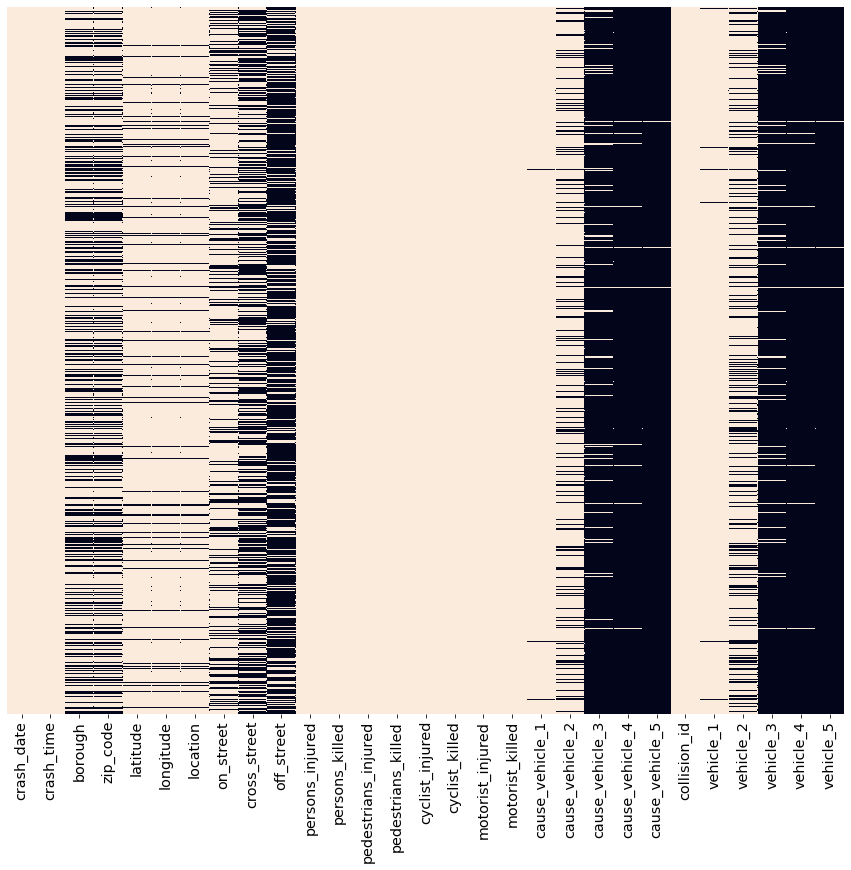

In [19]:
plot_null_matrix(mvc_19)

In [20]:
cols_with_missing_vals = mvc_19.columns[mvc_19.isnull().sum() > 0]
missing_corr = mvc_19[cols_with_missing_vals].isnull().corr()
missing_corr

,borough,zip_code,latitude,longitude,location,on_street,cross_street,off_street,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5
borough,1.000000,0.999624,0.270421,0.270421,0.270421,-0.376367,0.400326,0.376768,-0.016658,-0.057440,-0.054599,-0.018664,-0.004880,-0.023295,-0.072713,-0.053378,-0.017559,-0.004754
zip_code,0.999624,1.000000,0.270282,0.270282,0.270282,-0.376129,0.400257,0.376530,-0.016677,-0.057433,-0.054572,-0.018619,-0.004857,-0.023321,-0.072659,-0.053355,-0.017514,-0.004731
latitude,0.270421,0.270282,1.000000,1.000000,1.000000,-0.109664,0.010537,0.109755,-0.010231,-0.024493,-0.015133,-0.007741,0.001938,-0.015103,-0.036122,-0.014710,-0.007679,0.001478
longitude,0.270421,0.270282,1.000000,1.000000,1.000000,-0.109664,0.010537,0.109755,-0.010231,-0.024493,-0.015133,-0.007741,0.001938,-0.015103,-0.036122,-0.014710,-0.007679,0.001478
location,0.270421,0.270282,1.000000,1.000000,1.000000,-0.109664,0.010537,0.109755,-0.010231,-0.024493,-0.015133,-0.007741,0.001938,-0.015103,-0.036122,-0.014710,-0.007679,0.001478
on_street,-0.376367,-0.376129,-0.109664,-0.109664,-0.109664,1.000000,0.553049,-0.999702,0.001219,0.092356,0.006940,-0.007244,-0.004570,0.007502,0.118675,0.007475,-0.006556,-0.004880
cross_street,0.400326,0.400257,0.010537,0.010537,0.010537,0.553049,1.000000,-0.552884,-0.012169,0.027489,-0.055652,-0.028765,-0.014498,-0.014170,0.038675,-0.054124,-0.027656,-0.014210
off_street,0.376768,0.376530,0.109755,0.109755,0.109755,-0.999702,-0.552884,1.000000,-0.001233,-0.092305,-0.007126,0.007098,0.004587,-0.007524,-0.118616,-0.007669,0.006405,0.004897
cause_vehicle_1,-0.016658,-0.016677,-0.010231,-0.010231,-0.010231,0.001219,-0.012169,-0.001233,1.000000,0.133529,0.015509,0.006965,0.003606,0.568910,0.111667,0.015099,0.006803,0.003508
cause_vehicle_2,-0.057440,-0.057433,-0.024493,-0.024493,-0.024493,0.092356,0.027489,-0.092305,0.133529,1.000000,0.116149,0.052161,0.027005,0.185017,0.797818,0.113073,0.050950,0.026272


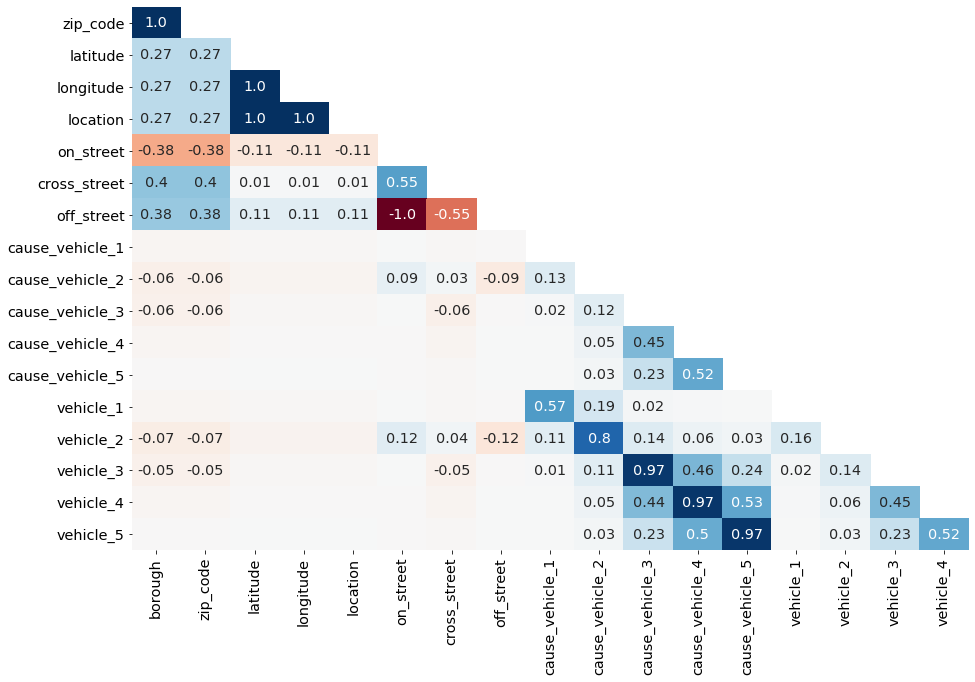

In [21]:
def plot_null_correlations(df):
    # create a correlation matrix only for columns with at least
    # one missing value
    cols_with_missing_vals = df.columns[df.isnull().sum() > 0]
    missing_corr = df[cols_with_missing_vals].isnull().corr()
    
    # create a triangular mask to avoid repeated values and make
    # the plot easier to read
    missing_corr = missing_corr.iloc[1:, :-1]
    mask = np.triu(np.ones_like(missing_corr), k=1)
    
    # plot a heatmap of the values
    plt.figure(figsize=(15,10))
    ax = sns.heatmap(missing_corr, vmin=-1, vmax=1, cbar=False,
                     cmap='RdBu', mask=mask, annot=True)
    
    # format the text in the plot to make it easier to read
    for text in ax.texts:
        t = float(text.get_text())
        if -0.05 < t < 0.01:
            text.set_text('')
        else:
            text.set_text(round(t, 2))
        text.set_fontsize('x-large')
    plt.xticks(rotation=90, size='x-large')
    plt.yticks(rotation=0, size='x-large')

    plt.show()
    
# veh_cols = [ c for c in mvc.columns if 'vehicle' in c]
plot_null_correlations(mvc_19)

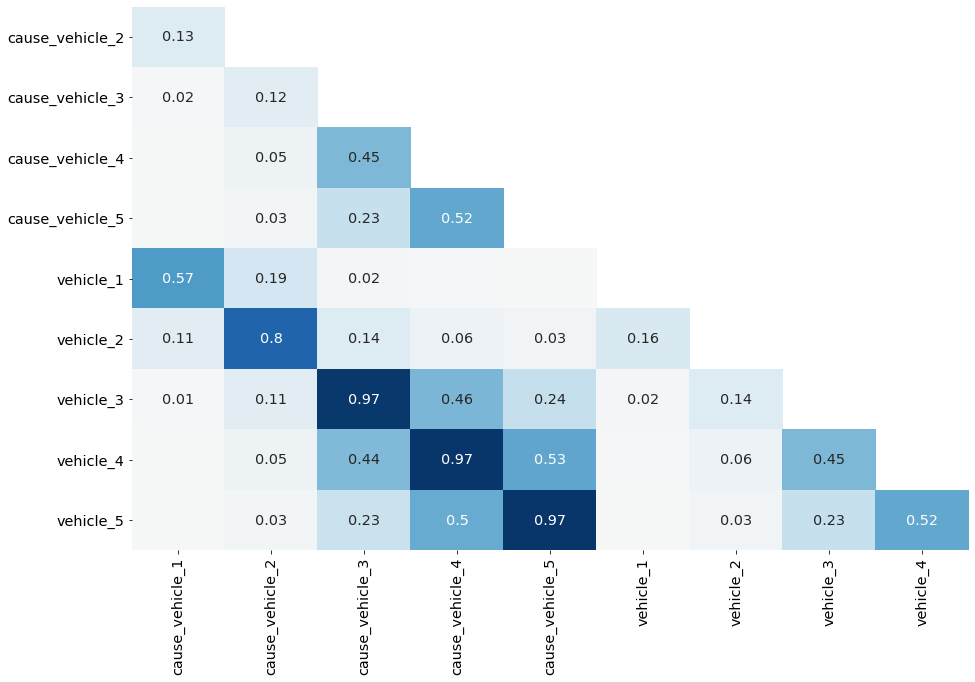

In [22]:
veh_cols = [ c for c in mvc_19.columns if 'vehicle' in c]
plot_null_correlations(mvc_19[veh_cols])

In [0]:
col_labels = ['v_number', 'vehicle_missing', 'cause_missing']

vc_null_data = []

for v in range(1,6):
    v_col = 'vehicle_{}'.format(v)
    c_col = 'cause_vehicle_{}'.format(v)
    v_null = (mvc_19[v_col].isnull() & mvc_19[c_col].notnull()).sum()
    c_null = (mvc_19[c_col].isnull() & mvc_19[v_col].notnull()).sum()
    
    vc_null_data.append([v, v_null, c_null])

vc_null_df = pd.DataFrame(vc_null_data, columns=col_labels)

In [24]:
vc_null_df

,v_number,vehicle_missing,cause_missing
0,1,429,72
1,2,6509,629
2,3,403,38
3,4,79,7
4,5,24,1


One common option when imputing is to use the most common value to fill in data. Let's look at the common values across these columns and see if we can use that to make a decision.


Let's use the `DataFrame.stack()` and `Series.value_counts()` technique to count the most common values for the cause set of columns. We'll start by selecting only the columns containing the substring `CONTRIBUTING FACTOR VEHICLE `.

In [25]:
cause_cols = [c for c in mvc_19.columns if "cause_vehicle_" in c]
cause = mvc_19[cause_cols]
cause_1d = cause.stack()
cause_counts = cause_1d.value_counts()
top10_cause = cause_counts.head(10)
top10_cause

Unspecified                       111637
Driver Inattention/Distraction     35663
Following Too Closely              11807
Failure to Yield Right-of-Way       8405
Passing or Lane Usage Improper      5936
Backing Unsafely                    5342
Passing Too Closely                 5232
Other Vehicular                     4908
Unsafe Lane Changing                4102
Turning Improperly                  2667
dtype: int64

In [26]:
v_cols = [c for c in mvc_19.columns if c.startswith("vehicle_")]
vehicles = mvc_19[v_cols]
vehicles_1d = vehicles.stack()
vehicles_counts = vehicles_1d.value_counts()
top10_vehicles = vehicles_counts.head(10)
top10_vehicles

Sedan                                  89356
Station Wagon/Sport Utility Vehicle    77539
Taxi                                    9259
Pick-up Truck                           6779
Box Truck                               4984
Bike                                    3418
Bus                                     3345
Tractor Truck Diesel                    1741
Van                                     1365
Motorcycle                              1227
dtype: int64

The vehicles columns don't have an equivalent, but we can still use the same technique. Here's the logic we'll need to do for each pair of vehicle/cause columns:

 - For values where the vehicle is null and the cause is non-null, set the vehicle to `Unspecified`.
 - For values where the cause is null and the vehicle is not-null, set the cause to `Unspecified`.

In [27]:
def summarize_missing(df):
    v_missing_data = []

    for v in range(1,6):
        v_col = 'vehicle_{}'.format(v)
        c_col = 'cause_vehicle_{}'.format(v)

        v_missing = (df[v_col].isnull() & df[c_col].notnull()).sum()
        c_missing = (df[c_col].isnull() & df[v_col].notnull()).sum()

        v_missing_data.append([v, v_missing, c_missing])

    col_labels = columns=["vehicle_number", "vehicle_missing", "cause_missing"]
    return pd.DataFrame(v_missing_data, columns=col_labels)

summary_before = summarize_missing(mvc_19)
summary_before

,vehicle_number,vehicle_missing,cause_missing
0,1,429,72
1,2,6509,629
2,3,403,38
3,4,79,7
4,5,24,1


In [28]:
for v in range(1,6):
    v_col = 'vehicle_{}'.format(v)
    c_col = 'cause_vehicle_{}'.format(v)

    #mvc_19_copy = mvc_19.copy()
    
    v_missing_mask = (mvc_19[v_col].isnull() & mvc_19[c_col].notnull())
    c_missing_mask = (mvc_19[c_col].isnull() & mvc_19[v_col].notnull())
    
    mvc_19[v_col] = mvc_19[v_col].mask(v_missing_mask, 'Unspecified')
    mvc_19[c_col] = mvc_19[c_col].mask(c_missing_mask, 'Unspecified')
    
summary_after = summarize_missing(mvc_19)
summary_after

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,vehicle_number,vehicle_missing,cause_missing
0,1,0,0
1,2,0,0
2,3,0,0
3,4,0,0
4,5,0,0


In [29]:
loc_cols = ['borough', 'location', 'on_street', 'off_street', 'cross_street']
location_data = mvc_19[loc_cols]
location_data.head(20)

,borough,location,on_street,off_street,cross_street
0,MANHATTAN,POINT (-73.98686 40.75108),WEST 36 STREET,NaN,AVENUE OF THE AMERICAS
1,BRONX,POINT (-73.87439 40.879055),EAST GUN HILL ROAD,NaN,PERRY AVENUE
2,BROOKLYN,POINT (-73.903824 40.657856),NaN,843 STONE AVENUE,NaN
3,NaN,NaN,PELHAM PARKWAY SOUTH,NaN,EASTCHESTER ROAD
4,STATEN ISLAND,POINT (-74.084656 40.615204),TARGEE STREET,NaN,VANDERBILT AVENUE
5,NaN,POINT (-74.002144 40.729794),AVENUE OF THE AMERICAS,NaN,NaN
6,MANHATTAN,POINT (-73.9862 40.757404),NaN,200 WEST 44 STREET,NaN
7,QUEENS,POINT (-73.755745 40.658688),226 STREET,NaN,147 AVENUE
8,QUEENS,POINT (-73.77612 40.667847),NORTH CONDUIT AVENUE,NaN,159 STREET
9,BROOKLYN,POINT (-73.92988 40.66399),EAST NEW YORK AVENUE,NaN,EAST 92 STREET


In [30]:
print(location_data.isnull().sum())

borough         39168
location         9406
on_street       26524
off_street      83878
cross_street    56118
dtype: int64


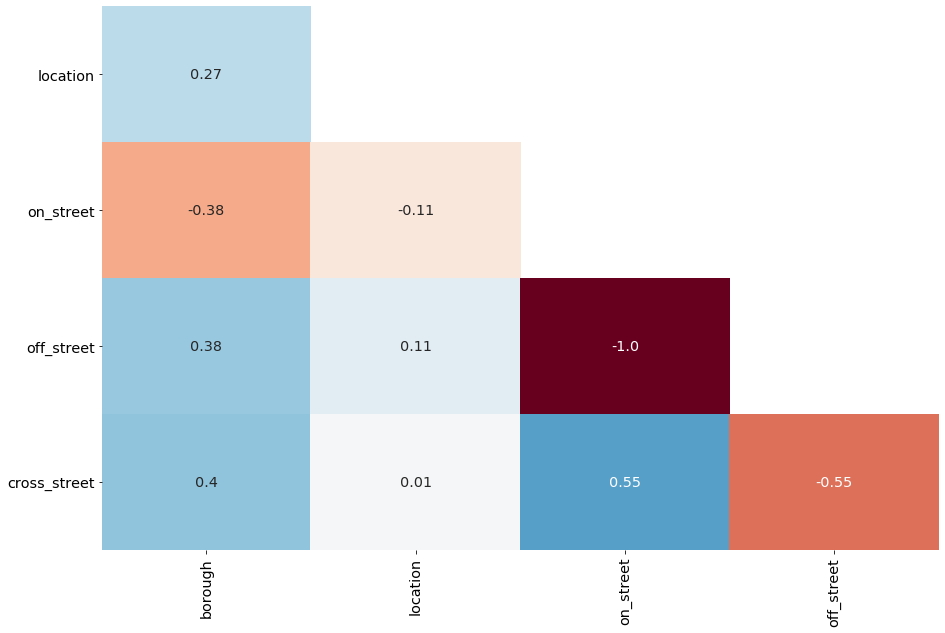

In [31]:
plot_null_correlations(location_data)

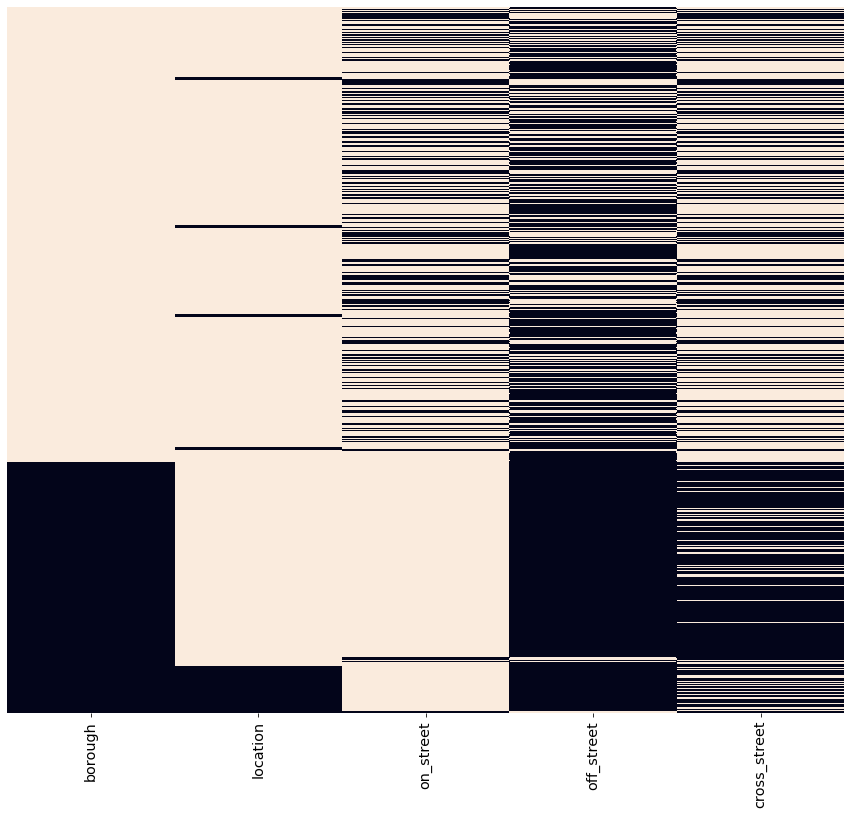

In [32]:
sorted_location_data = location_data.sort_values(loc_cols)
plot_null_matrix(sorted_location_data)

 - For rows with location values but missing values in either borough or the street name columns, we used geocoding APIs to look up the location coordinates to find the missing data.
 - For rows with values in the street name columns missing borough and/or location data, we used geocoding APIs to look up the address to find the missing data.

In [0]:
loc_cols = ['borough', 'location', 'on_street', 'off_street', 'cross_street']
location_data = mvc_19[loc_cols]
location_data.head(20)

In [43]:
location_data_b = location_data[location_data['location'].notnull() & location_data['borough'].isnull()]
location_data_b.sample(5)

,borough,location,on_street,off_street,cross_street
86494,NaN,POINT (-73.89338 40.8464),EAST TREMONT AVENUE,NaN,NaN
55870,NaN,POINT (-73.92588 40.866024),BROADWAY,NaN,NaN
7276,NaN,POINT (-73.95454 40.642887),BEDFORD AVENUE,NaN,NaN
89421,NaN,POINT (-73.799866 40.75603),167 STREET,NaN,NaN
95795,NaN,POINT (-73.82557 40.84211),BRUCKNER EXPRESSWAY,NaN,NaN


In [44]:
location_data_b.shape

(31843, 5)